### Algorithm: Linear Regression

* Import Libraries
* Generate Synthetic Data
  * Define Slope and Intercept
  * Y = Slope * X + Intercept + Noise
* Define number_of_iterations, learning rate
* Initialize Weights and Bias
* While iteration < number_of_iterations (or loss less than threshold):
  * Predict Y using weights and bias ( WX + B)
  * Calculate derivatives of weights and bias with respect to loss
    * dW = - ( 2 * (X.T ).dot(Y - Y_pred )  ) / m
    * db = - 2 * np.sum(Y - Y_pred ) / m
    * Update Weights: weights = weights - learning_rate * dW
    * Update Bias: bias = bias - learning_rate * db
* Get the final weights and bias
* Predict using learned weights and bias
* Calculate loss (MSE, RMSE etc..)
* Plot results

In [1]:
# Importing libraries  
import numpy as np  
import pandas as pd  
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt
from sklearn.metrics import (
    r2_score,
    mean_squared_error
)

This Python function `generate_synthetic_data(n)` is used to generate synthetic data for regression analysis. Here's a step-by-step explanation:

1. The function takes one argument `n`, which is the number of data points to be generated.

2. `X = np.random.rand(n, 1)`: This line generates an array of `n` random numbers between 0 and 1. Each number is considered as a feature for a data point.

3. `y = 2 + 3 * X + (np.random.randn(n, 1)/5)`: This line generates the target variable `y` for each data point. The value of `y` is calculated based on the equation of a line `y = mx + c` where `m` is the slope (3 in this case), `c` is the y-intercept (2 in this case), and `x` is the feature value. `(np.random.randn(n, 1)/5)` is added to introduce some noise to the data. The noise is scaled down by a factor of 5 compared to the previous version of the function.

4. `data = pd.DataFrame(np.hstack([X, y]), columns=['X', 'y'])`: This line creates a pandas DataFrame from the generated `X` and `y` values. `np.hstack([X, y])` horizontally stacks the `X` and `y` arrays. The resulting DataFrame has two columns: 'X' and 'y'.

5. Finally, the function returns the created DataFrame.

This function is useful when you want to create a simple dataset for testing or demonstrating machine learning algorithms, especially regression models.




In [18]:
def generate_synthetic_data(n):
    # Generate random data
    X = np.random.rand(n, 1)
    y = 2 + 3 * X + (np.random.randn(n, 1)/2)
    
    # Convert to pandas DataFrame
    data = pd.DataFrame(np.hstack([X, y]), columns=['X', 'y'])
    
    return data

Python function `predict(weights, bias, X)` is used to make predictions using a linear regression model. Here's a step-by-step explanation:

1. The function takes three arguments: `weights`, `bias`, and `X`. `weights` are the coefficients for each feature in the dataset, `bias` is the y-intercept of the linear model, and `X` is the input data (features).

2. `return X.dot(weights) + bias`: This line calculates the predicted output. `X.dot(weights)` is the dot product of the input data and the weights, which essentially means it multiplies each feature value with its corresponding weight and sums them all up. Then, it adds the `bias` to this sum. 





In [19]:
# Predict function  h( x ) 
def predict(weights, bias, X ) :
    return X.dot( weights ) + bias

Python function `update_weights(weights, bias, X, Y, m)` is used to update the weights and bias in the gradient descent algorithm for a linear regression model. Here's a step-by-step explanation:

1. The function takes five arguments: `weights`, `bias`, `X`, `Y`, and `m`. `weights` are the coefficients for each feature in the dataset, `bias` is the y-intercept of the linear model, `X` is the input data (features), `Y` is the actual output data (target), and `m` is the number of training examples.

2. `Y_pred = predict(weights, bias, X)`: This line calculates the predicted output using the current weights and bias.

3. `dW = - ( 2 * (X.T ).dot(Y - Y_pred )  ) / m`: This line calculates the gradient of the loss function with respect to the weights. It's the average of the product of the features and the difference between the actual and predicted outputs.

4. `db = - 2 * np.sum(Y - Y_pred ) / m`: This line calculates the gradient of the loss function with respect to the bias. It's the average of the difference between the actual and predicted outputs.

5. `weights = weights - learning_rate * dW` and `bias = bias - learning_rate * db`: These lines update the weights and bias by subtracting the product of the learning rate and the gradients. This is the key step in the gradient descent algorithm.

6. Finally, the function returns the updated weights and bias.




In [20]:
# Function to update weights in gradient descent      
def update_weights(weights, bias, X, Y, m ) :

    Y_pred = predict( weights, bias, X ) 

    # calculate gradients        
    dW = - ( 2 * (X.T ).dot(Y - Y_pred )  ) / m       
    db = - 2 * np.sum(Y - Y_pred ) / m 
      
    # update weights      
    weights = weights - learning_rate * dW      
    bias = bias - learning_rate * db
      
    return weights, bias

Function `fit(X, Y)` is used to train a linear regression model using the gradient descent algorithm. Here's a step-by-step explanation:

1. The function takes two arguments: `X` and `Y`. `X` is the input data (features) and `Y` is the actual output data (target).

2. `m, n = X.shape`: This line gets the number of training examples `m` and the number of features `n` from the shape of the input data.

3. `weights = np.zeros(n)` and `bias = 0`: These lines initialize the weights and bias to zero. The weights are a numpy array of zeros with a length equal to the number of features.

4. The for loop `for i in range(iterations)`: This loop runs the gradient descent algorithm for a specified number of iterations. In each iteration, it updates the weights and bias using the `update_weights` function.

5. Finally, the function returns the trained weights and bias.

This function is typically the main function used to train a linear regression model. After training, the weights and bias can be used to make predictions on new data.



In [21]:

def fit( X, Y ) :          
    # no_of_training_examples, no_of_features          
    m, n = X.shape

    # weight initialization          
    weights = np.zeros( n )          
    bias = 0                    
      
    # gradient descent learning                  
    for i in range(iterations ) :              
        weights, bias = update_weights(weights, bias, X, Y, m)
          
    return weights, bias

#### Generate dataset

In [22]:
# Generating dataset      
df = generate_synthetic_data(1000)

In [23]:
df.head()

,X,y
0,0.528176,3.698302
1,0.705589,3.491827
2,0.124486,2.058984
3,0.682945,3.991091
4,0.061234,1.600637


#### Assign Features (X) and Actual Output (Y) from generated Dataset

In [24]:
X = df.iloc[:,:-1].values  
Y = df.iloc[:,1].values

#### Split data into train and test

In [25]:
# Splitting dataset into train and test set  
X_train, X_test, Y_train, Y_test = train_test_split( 
X, Y, test_size = 1/3, random_state = 0 )

#### Model training
* Define number of iterations
* Define learning rate
* Fit the model

In [26]:
# Model training      
iterations = 1000 
learning_rate = 0.01   
weights, bias = fit( X_train, Y_train )

#### Prediction on test set

In [27]:
# Prediction on test set  
Y_pred = predict(weights, bias, X_test )

#### Analyse trained weights & bias

Trained weights and bias is closer to the actual ones used while generating data

In [28]:
print( "Predicted values ", np.round( Y_pred[:3], 2 ) )       
print( "Real values      ", Y_test[:3] )      
print( "Trained Weights        ", round( weights[0], 2 ) )      
print( "Trained bias        ", round( bias, 2 ) )

Predicted values  [4.27 3.95 3.06]
Real values       [4.81170709 3.90516999 2.81317635]
Trained Weights         2.59
Trained bias         2.23


#### Calculate RMSE and R Squared value

In [29]:
print("Root Mean Squared Error",np.sqrt(mean_squared_error(Y_test,Y_pred)))
r2 = r2_score(Y_test,Y_pred)
print("R^2", r2)

Root Mean Squared Error 0.511355984697048
R^2 0.7377899600024684


#### Calculate adusted R Square value

In [30]:
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted R^2",adjusted_r_squared)

Adjusted R^2 0.7375272244914488


#### Plot Actual Vr Prediction

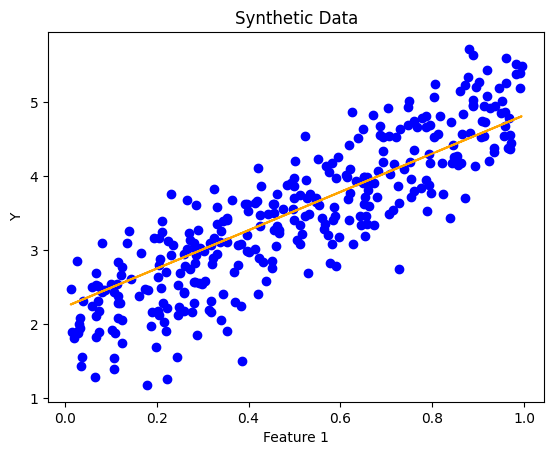

In [31]:
# Visualization on test set       
plt.scatter( X_test, Y_test, color = 'blue' )      
plt.plot( X_test, Y_pred, color = 'orange' )      
plt.title( 'Synthetic Data' )      
plt.xlabel( 'Feature 1' )      
plt.ylabel( 'Y' )
  
plt.show()